In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

170498071/170498071 [==============================] - 4s 0us/step
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


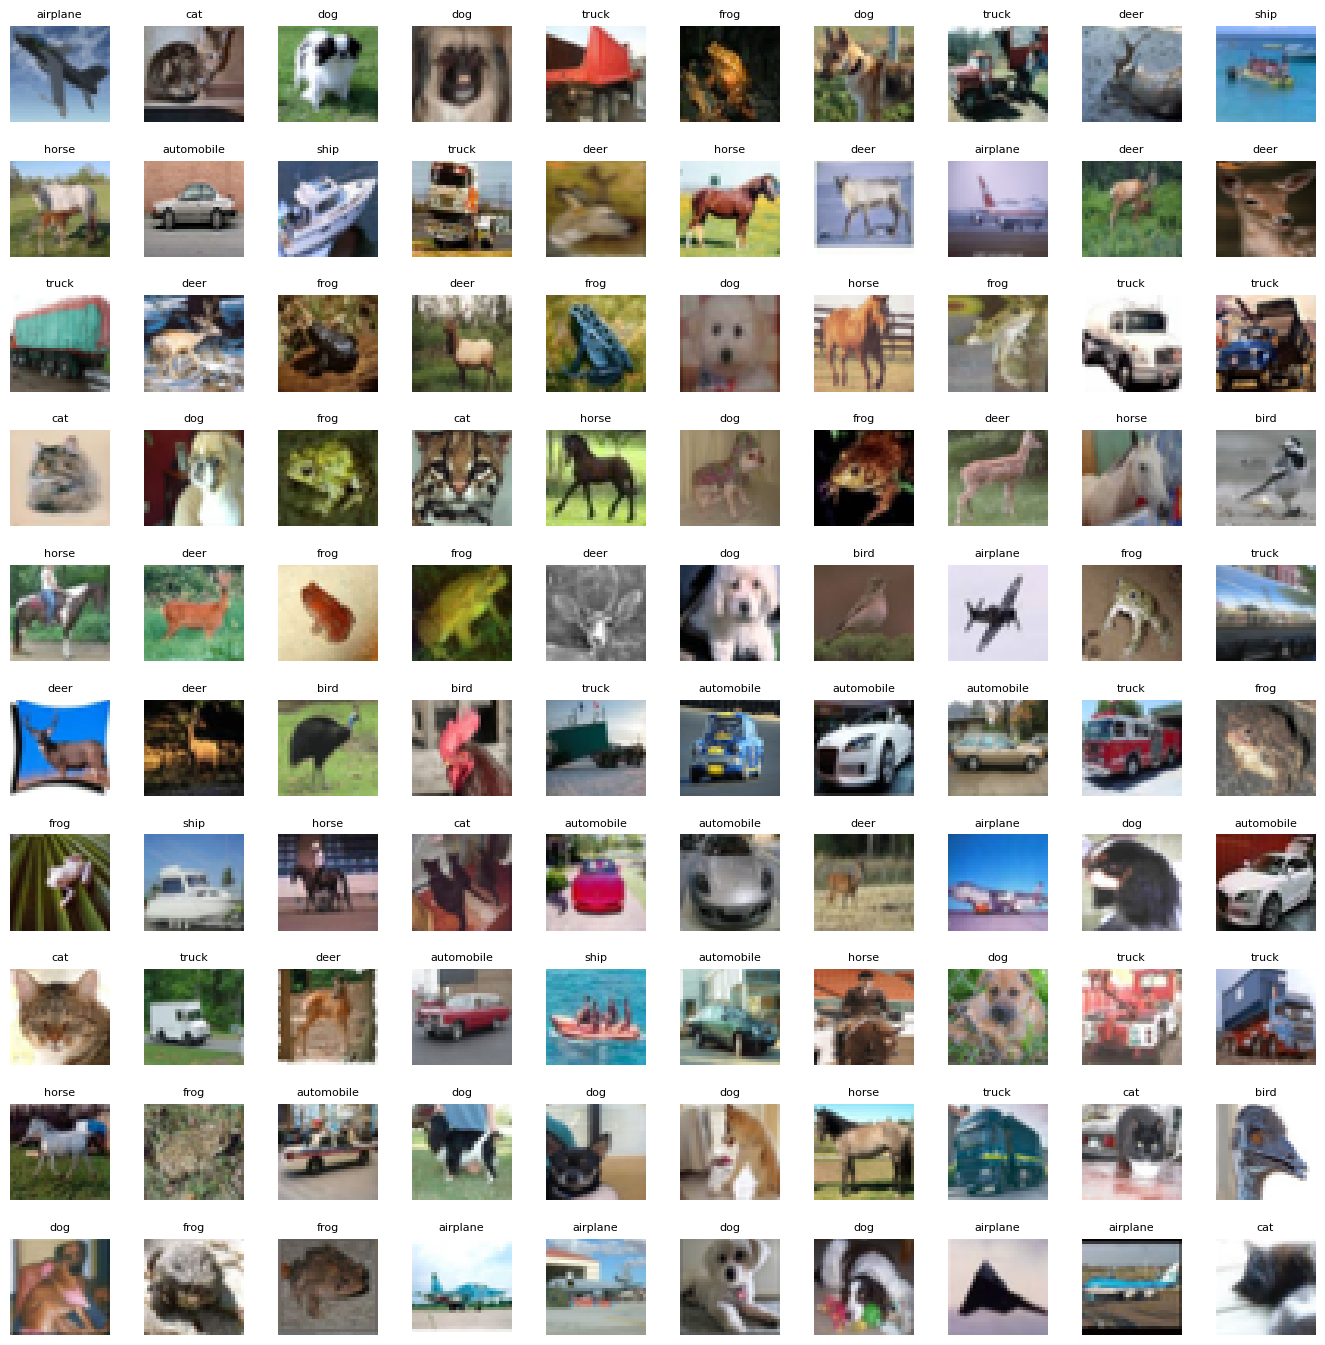

In [4]:

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']


W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel()

n_train = len(X_train)

for i in np.arange(0, W_grid * L_grid):


    index = np.random.randint(0, n_train)

    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

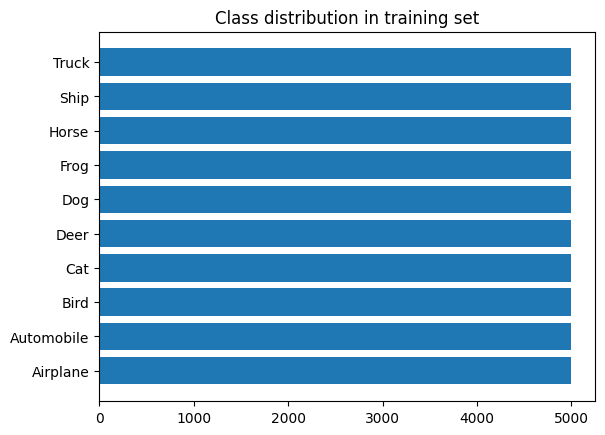

In [5]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

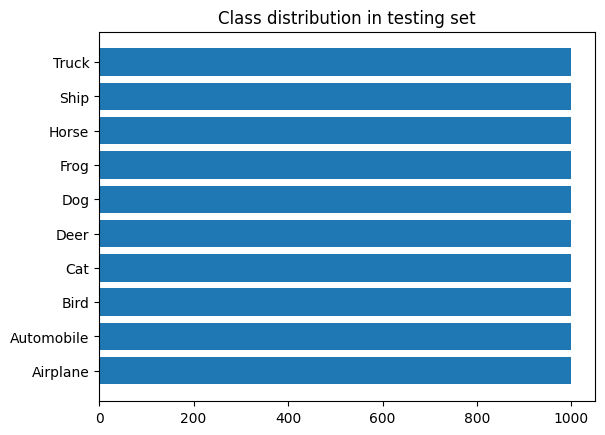

In [6]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

In [7]:

X_train = X_train / 255.0
X_test = X_test / 255.0


y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [8]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# Experiments

Возьму бейзлайн из keras документации

In [41]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    tf.keras.metrics.F1Score(name='f1'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=METRICS)

In [39]:
first_try = model.fit(X_train, y_cat_train, epochs=10,
                    validation_data=(X_test, y_cat_test))

Epoch 1/10
1563/1563 [==============================] - 18s 10ms/step - loss: 1.6499 - f1: 0.4243 - precision: 0.6428 - recall: 0.2558 - val_loss: 1.7457 - val_f1: 0.4962 - val_precision: 0.6109 - val_recall: 0.4166
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2489 - f1: 0.5699 - precision: 0.7327 - recall: 0.4334 - val_loss: 1.9126 - val_f1: 0.4993 - val_precision: 0.5818 - val_recall: 0.4189
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1420 - f1: 0.6190 - precision: 0.7634 - recall: 0.4990 - val_loss: 1.1561 - val_f1: 0.6320 - val_precision: 0.8016 - val_recall: 0.4840
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0531 - f1: 0.6544 - precision: 0.7835 - recall: 0.5450 - val_loss: 0.8906 - val_f1: 0.7026 - val_precision: 0.8054 - val_recall: 0.6126
Epoch 5/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.9619 - f1: 0.6809 - precision: 0.7975 - recall: 0.5868 - v

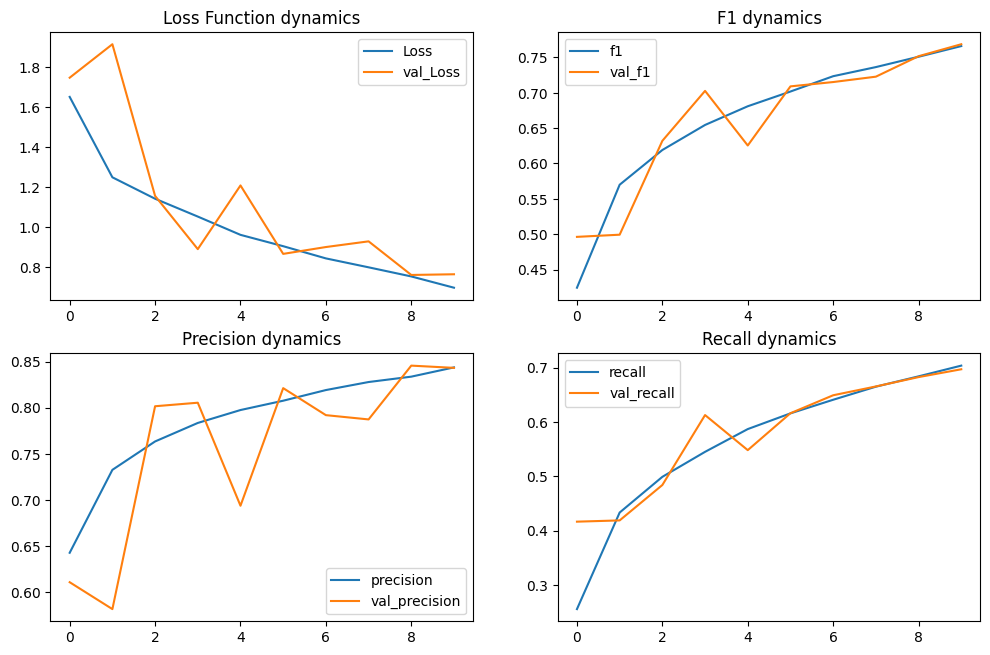

In [40]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(first_try.history['loss'], label='Loss')
plt.plot(first_try.history['val_loss'], label='val_Loss')
plt.title('Loss Function dynamics')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot((np.mean(first_try.history['f1'],axis = 1)), label='f1')
plt.plot((np.mean(first_try.history['val_f1'],axis = 1)), label='val_f1')
plt.title('F1 dynamics')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(first_try.history['precision'], label='precision')
plt.plot(first_try.history['val_precision'], label='val_precision')
plt.title('Precision dynamics')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(first_try.history['recall'], label='recall')
plt.plot(first_try.history['val_recall'], label='val_recall')
plt.title('Recall dynamics')
plt.legend()

добавлю еще промежуточные свертки, чтоб добиться бОльшего качества в пороге, плюс видно, что метрики сходятся неплавно

In [42]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    tf.keras.metrics.F1Score(name='f1'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=METRICS)

In [43]:
second_try = model.fit(X_train, y_cat_train, epochs=10,
                    validation_data=(X_test, y_cat_test))

Epoch 1/10
1563/1563 [==============================] - 19s 10ms/step - loss: 1.5427 - f1: 0.4589 - precision: 0.6422 - recall: 0.2912 - val_loss: 1.3117 - val_f1: 0.5433 - val_precision: 0.7154 - val_recall: 0.3932
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1272 - f1: 0.6138 - precision: 0.7487 - recall: 0.4903 - val_loss: 1.0880 - val_f1: 0.6428 - val_precision: 0.7389 - val_recall: 0.5649
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9919 - f1: 0.6675 - precision: 0.7830 - recall: 0.5609 - val_loss: 1.0197 - val_f1: 0.6755 - val_precision: 0.7760 - val_recall: 0.5881
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9022 - f1: 0.6971 - precision: 0.8035 - recall: 0.6062 - val_loss: 0.7803 - val_f1: 0.7380 - val_precision: 0.8181 - val_recall: 0.6647
Epoch 5/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.8310 - f1: 0.7219 - precision: 0.8156 - recall: 0.6398 - va

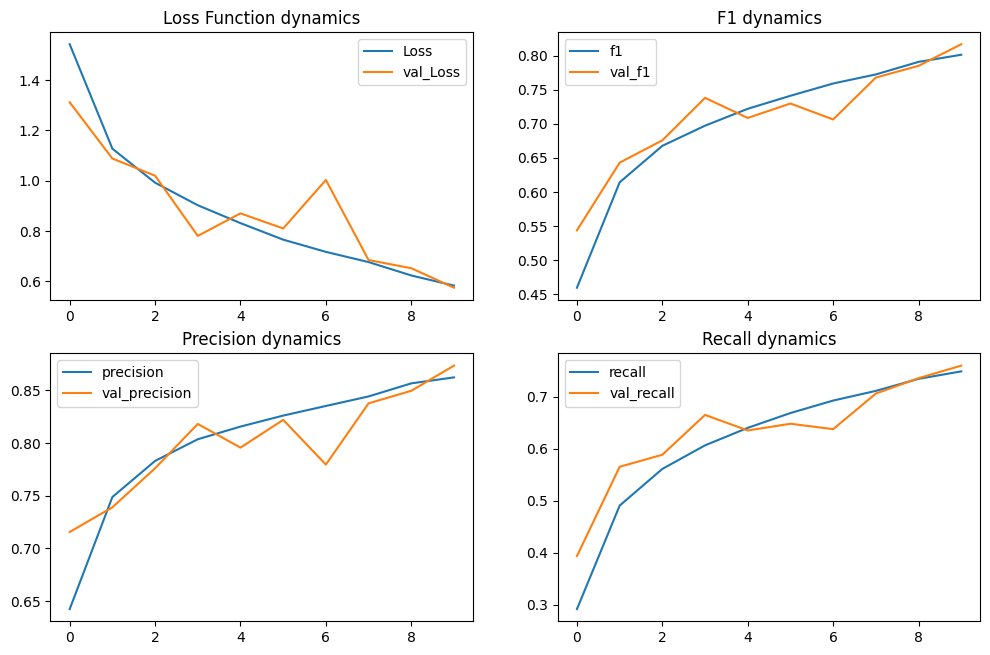

In [44]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(second_try.history['loss'], label='Loss')
plt.plot(second_try.history['val_loss'], label='val_Loss')
plt.title('Loss Function dynamics')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot((np.mean(second_try.history['f1'],axis = 1)), label='f1')
plt.plot((np.mean(second_try.history['val_f1'],axis = 1)), label='val_f1')
plt.title('F1 dynamics')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(second_try.history['precision'], label='precision')
plt.plot(second_try.history['val_precision'], label='val_precision')
plt.title('Precision dynamics')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(second_try.history['recall'], label='recall')
plt.plot(second_try.history['val_recall'], label='val_recall')
plt.title('Recall dynamics')
plt.legend()

Метрики стали выше, но все еще неплавно -- попробую поменять оптимизатор

In [9]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    tf.keras.metrics.F1Score(name='f1'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

In [12]:
history = model.fit(X_train, y_cat_train, epochs=10,
                    validation_data=(X_test, y_cat_test))

Epoch 1/10
1563/1563 [==============================] - 25s 10ms/step - loss: 1.5324 - f1: 0.4465 - precision: 0.6563 - recall: 0.2497 - val_loss: 1.2596 - val_f1: 0.5477 - val_precision: 0.6999 - val_recall: 0.4237
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0944 - f1: 0.6126 - precision: 0.7569 - recall: 0.4751 - val_loss: 0.9040 - val_f1: 0.6842 - val_precision: 0.8007 - val_recall: 0.5813
Epoch 3/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.9096 - f1: 0.6845 - precision: 0.7991 - recall: 0.5781 - val_loss: 0.8395 - val_f1: 0.7056 - val_precision: 0.8077 - val_recall: 0.6087
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8026 - f1: 0.7258 - precision: 0.8205 - recall: 0.6365 - val_loss: 0.9037 - val_f1: 0.7095 - val_precision: 0.7852 - val_recall: 0.6287
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7163 - f1: 0.7549 - precision: 0.8377 - recall: 0.6783 - va

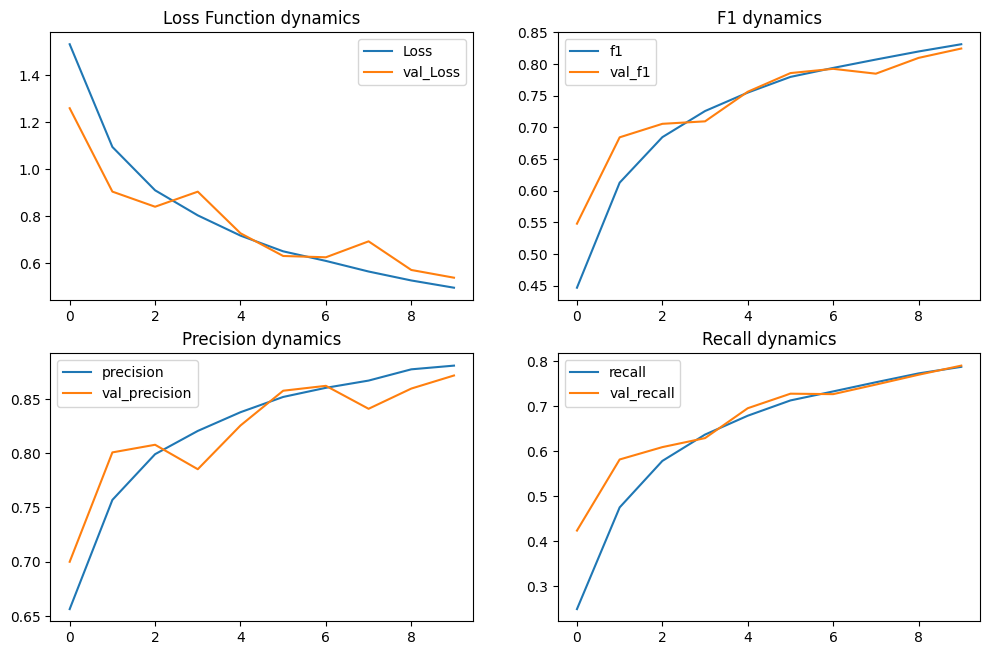

In [24]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function dynamics')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot((np.mean(history.history['f1'],axis = 1)), label='f1')
plt.plot((np.mean(history.history['val_f1'],axis = 1)), label='val_f1')
plt.title('F1 dynamics')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(history.history['precision'], label='precision')
plt.plot(history.history['val_precision'], label='val_precision')
plt.title('Precision dynamics')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(history.history['recall'], label='recall')
plt.plot(history.history['val_recall'], label='val_recall')
plt.title('Recall dynamics')
plt.legend()

Теперь метрики сходятся плавно, тест не расходится с трейном
### Спойлер : остановлюсь на этом варианте

Попробую Resnet, но на небольшом кол-ве эпох (возможно, в этом ошибка, но модель учится уж слишком долго)

In [36]:
from keras.applications import ResNet101V2
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
base_model = ResNet101V2(input_shape=(32, 32, 3), include_top=False, weights='imagenet', pooling='avg')
model.add(base_model)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)
r = model.fit(X_train, y_cat_train,
              epochs=10,

              validation_data=(X_test, y_cat_test),
             )

171317808/171317808 [==============================] - 2s 0us/step
Epoch 1/10
1563/1563 [==============================] - 202s 92ms/step - loss: 2.2861 - f1: 0.2306 - precision: 0.6622 - recall: 0.1039 - val_loss: 2.4572 - val_f1: 0.0899 - val_precision: 0.2258 - val_recall: 0.0021
Epoch 2/10
1563/1563 [==============================] - 140s 89ms/step - loss: 2.1405 - f1: 0.1502 - precision: 0.3163 - recall: 0.0098 - val_loss: 5.0404 - val_f1: 0.1297 - val_precision: 0.4610 - val_recall: 0.0260
Epoch 3/10
1563/1563 [==============================] - 132s 85ms/step - loss: 2.0110 - f1: 0.1986 - precision: 0.4192 - recall: 0.0212 - val_loss: 2.6193 - val_f1: 0.1679 - val_precision: 0.4540 - val_recall: 0.0153
Epoch 4/10
1563/1563 [==============================] - 131s 84ms/step - loss: 2.0945 - f1: 0.2049 - precision: 0.4185 - recall: 0.0290 - val_loss: 5.2726 - val_f1: 0.0810 - val_precision: 0.2817 - val_recall: 0.0936
Epoch 5/10
1563/1563 [==============================] - 132s 84ms

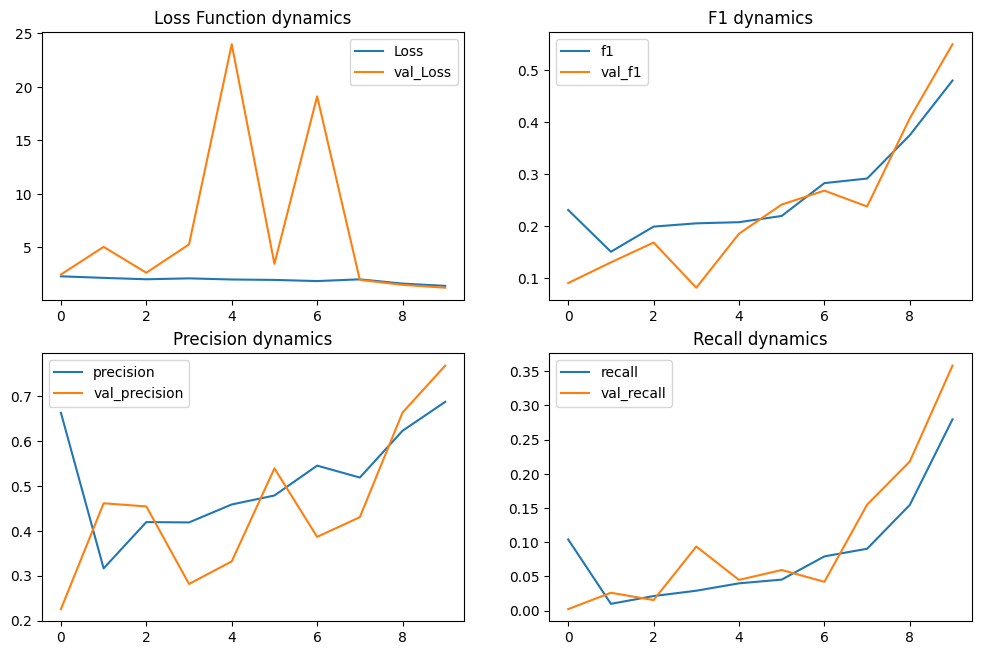

In [37]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function dynamics')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot((np.mean(r.history['f1'],axis = 1)), label='f1')
plt.plot((np.mean(r.history['val_f1'],axis = 1)), label='val_f1')
plt.title('F1 dynamics')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision dynamics')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall dynamics')
plt.legend()

на 10 эпохах оч плохое качество, но учить на 100+ проблематично ввиду того, что очень долго - runtime умирает, а локально тем более не потянет ноут

# Оценка кач-ва итоговой модели

313/313 [==============================] - 1s 3ms/step


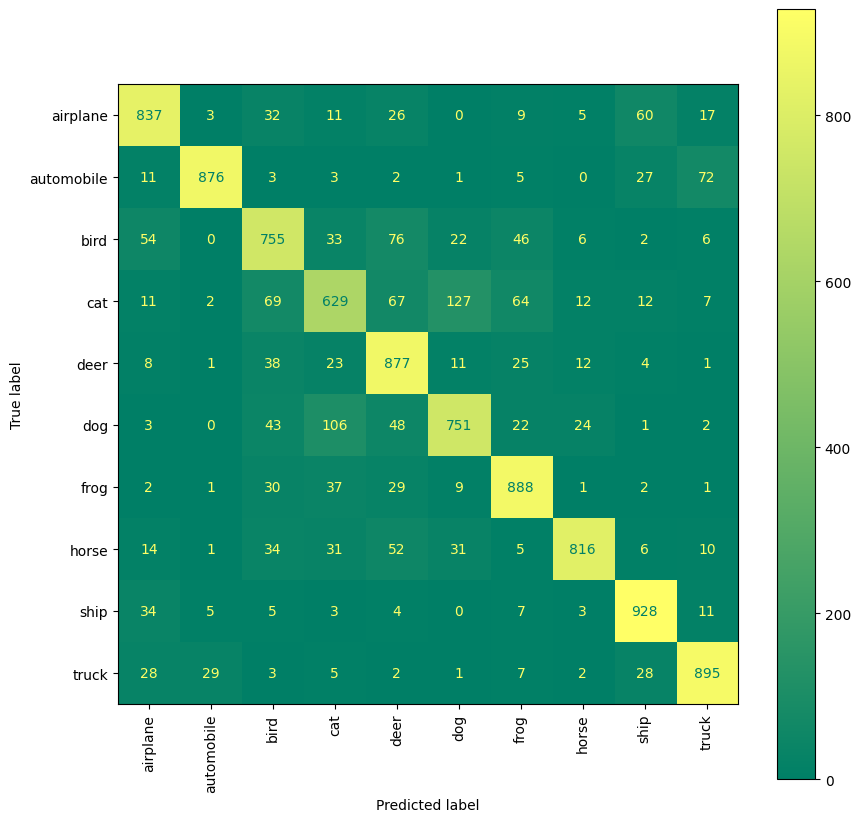

In [16]:
evaluation = model.evaluate(X_test, y_cat_test)

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)

fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1000
           1       0.95      0.88      0.91      1000
           2       0.75      0.76      0.75      1000
           3       0.71      0.63      0.67      1000
           4       0.74      0.88      0.80      1000
           5       0.79      0.75      0.77      1000
           6       0.82      0.89      0.85      1000
           7       0.93      0.82      0.87      1000
           8       0.87      0.93      0.90      1000
           9       0.88      0.90      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.82     10000
weighted avg       0.83      0.83      0.82     10000



## Test on one image

 Image 100 is [7]
1/1 [==============================] - 0s 369ms/step
The model predict that image 100 is 7


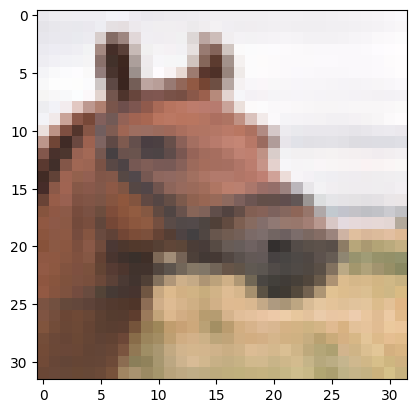

In [25]:
my_image = X_test[99]
plt.imshow(my_image)

# конь
print(f" Image 100 is {y_test[99]}")

#labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', #'horse'#, 'ship', 'truck']


# pravda Kon'
pred_99 = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 100 is {pred_99}")

In [ ]:

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel()

n_test = len(X_test)


for i in np.arange(0, W_grid * L_grid):


    index = np.random.randint(0, n_test)
    axes[i].imshow(X_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [27]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 [==============================] - 1s 2ms/step


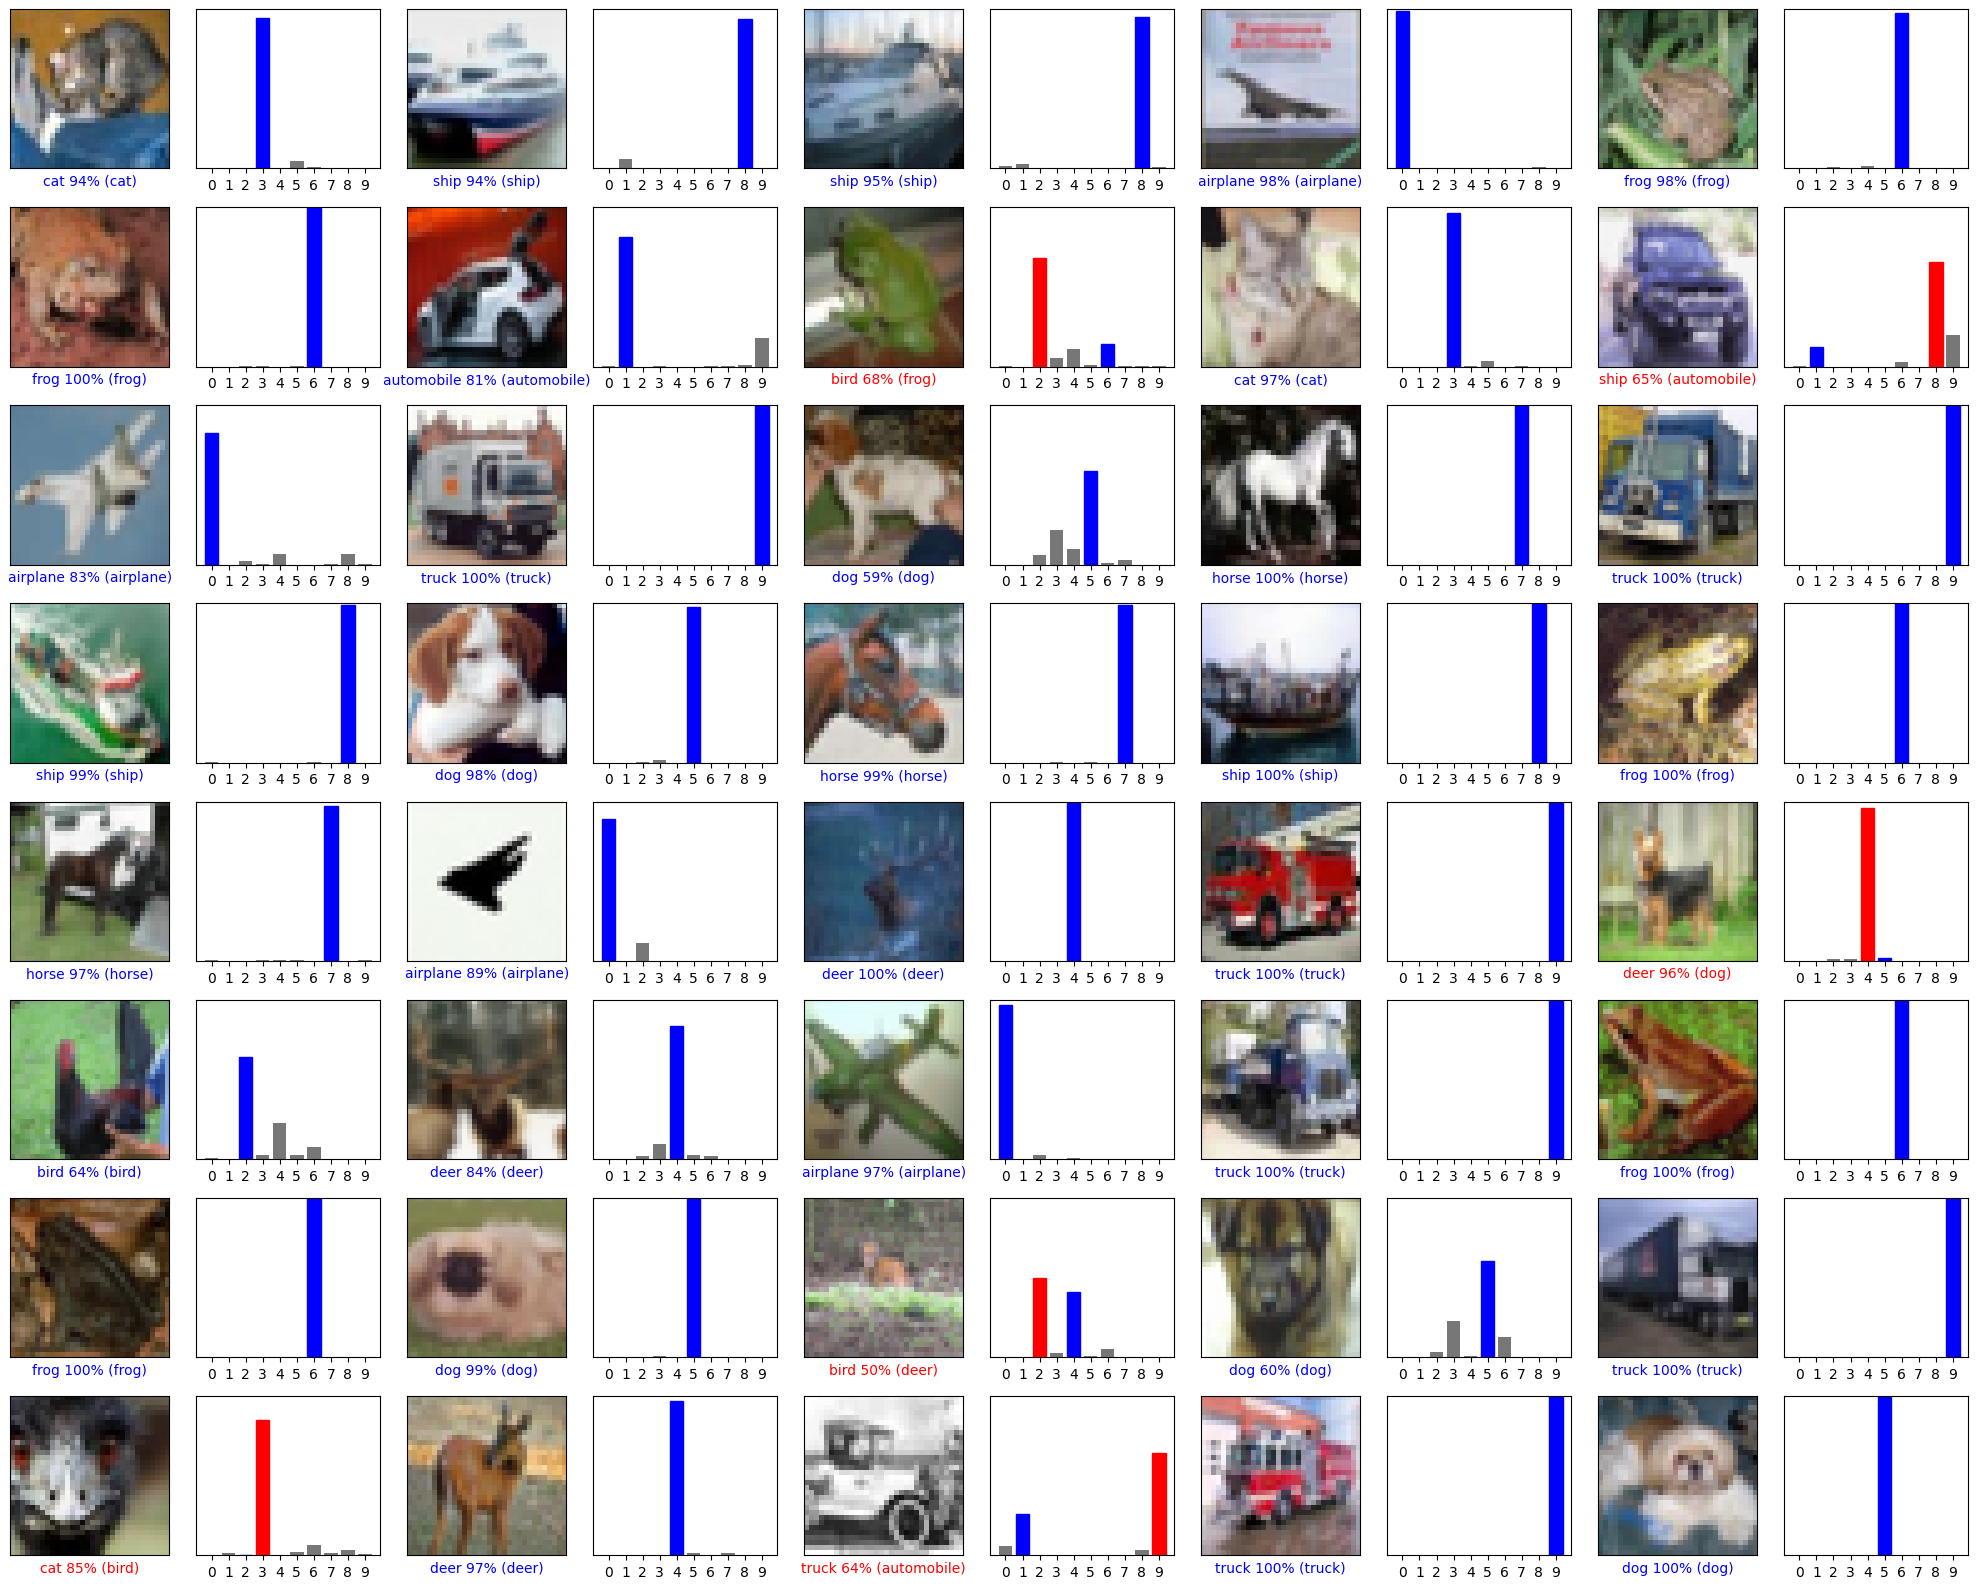

In [28]:
predictions = model.predict(X_test)


num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()